# ANUBIS

 
- **Authors:** Miravet-Verde, Samuel
- **Last update:** 04/29/2020 (MM/DD/YYYY)


ANUBIS is a Python framework to analyze Tn-seq data.


----

## Index of Content:
* [Requirements](#req)
* [Tn-seq data processing](#proc)
* [Installation](#req)
* [Tn-seq data processing](#proc)

----

## Requirements <a class="anchor" id="req"></a>

Specific libraries are required by ANUBIS. We provide a [requirements](./requirements.txt) file to install everything at once. To do so, you will need first to have [pip](https://pip.pypa.io/en/stable/installing/) installed and then run:

```
sudo apt-get install python-pip    # if you need to install pip
pip install -r requirements.txt
```

----

## Tn-seq data processing <a class="anchor" id="proc"></a>

ANUBIS has been mainly developed to work with [FASTQINS](https://github.com/CRG-CNAG/fastqins) generated files. This is a standard pipeline to process raw fastq Tn-seq files to obtain insertion profiles that can be interpreted by ANUBIS (.wig or .qins extensions).

----


## Installation<a class="anchor" id="install"></a>

Download ANUBIS repository and run:

```
python3 setup.py install
```

You may require to call it using sudo. Once installed, `anubis` will be integrated in your python distribution and can be called as:

In [34]:
import anubis 

# for jupyter:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Manual<a class="anchor" id="man"></a>

### Load a dataset

Load a dataset including the goldset as a two column file with the gene and the expected label.

In [20]:
d = anubis.dataset('./test/P02_R1_U0_PE1.qins', 
                   genome='./test/myco_pneumoniae_m129.gb', 
                   goldset='./test/goldsets.csv')
d.annotation = {k:v for k, v in d.annotation.items() if len(k)==6}
dir(d)    # dataset implements multiple functions to work with this kind of files

['GC',
 'NRL_for_annotation',
 'QC',
 'RAUC',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bin_metric_',
 '_bin_roll_',
 '_bin_window_size_',
 '_domains_evalue_',
 '_empty_profile_',
 '_metric_df',
 '_one_base_annotation_',
 '_roll_',
 '_set_profile_array_',
 '_single_metric_by',
 '_update_roll_',
 '_update_stats_',
 '_update_stats_from_array_',
 '_window_metric_',
 '_window_size_',
 'addition',
 'additional_annotation',
 'annotation',
 'annotation_per_base',
 'apositions',
 'aprofile',
 'condition',
 'copy',
 'correct_TSD',
 'correlate',
 'correlate_metric',
 'correlation_by_distance',
 'coverage',
 'cqn',
 'dataframe',
 'density',
 'difference',
 'dilution',
 'd

### Calculate metrics

Metric are calculated for annotations by default:

In [21]:
d.metric_by()   # compute all metrics by default, normalizing 
d.metric        # metrics are stored in a dataframe

/home/smiravet/crg/anubis/anubis/anubis/anubis_core.py:784: RuntimeWarning: invalid value encountered in true_divide
  return multiplying_factor*(np.array(value)-min(value))/(max(value)-min(value))


,sum,std,mean,median,count,L,min,max,I,dens,...,norm_count,norm_L,norm_min,norm_max,norm_I,norm_dens,norm_R,norm_RI,norm_CPM,norm_RPKM
ides,,,,,,,,,,,,,,,,,,,,,
MPN001,83.0,1.408811,0.080661,0.0,1029,1029,0.0,34.0,9.0,0.008746,...,0.191549,0.191549,NaN,0.002234,0.004907,0.011222,0.000143,2.078326e-06,0.000143,0.000178
MPN002,10311.0,49.043396,12.304296,0.0,838,838,0.0,673.0,266.0,0.317422,...,0.153478,0.153478,NaN,0.044212,0.145038,0.407281,0.017748,9.370154e-03,0.017748,0.027114
MPN003,61.0,0.697141,0.034679,0.0,1759,1759,0.0,23.0,9.0,0.005117,...,0.337054,0.337054,NaN,0.001511,0.004907,0.006565,0.000105,8.935418e-07,0.000105,0.000076
MPN004,150.0,1.841861,0.066138,0.0,2268,2268,0.0,81.0,13.0,0.005732,...,0.438509,0.438509,NaN,0.005321,0.007088,0.007355,0.000258,2.461500e-06,0.000258,0.000146
MPN005,22.0,0.247368,0.019349,0.0,1137,1137,0.0,5.0,10.0,0.008795,...,0.213076,0.213076,NaN,0.000328,0.005453,0.011285,0.000038,5.539500e-07,0.000038,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MPNt33,0.0,0.000000,0.000000,0.0,69,69,0.0,0.0,0.0,0.000000,...,0.000199,0.000199,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
MPNt34,15.0,1.779991,0.214286,0.0,70,70,0.0,15.0,1.0,0.014286,...,0.000399,0.000399,NaN,0.000985,0.000545,0.018330,0.000026,6.134816e-07,0.000026,0.000472
MPNt35,0.0,0.000000,0.000000,0.0,78,78,0.0,0.0,0.0,0.000000,...,0.001993,0.001993,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000


Metrics can be selected and computed for 'bin' or 'window':

In [27]:
d.metric_by(metric='I', by='window', window_size=20)   # extract insertions for a sliding window of size=20
d.metric        # metrics are stored in a dataframe

,I,norm_I
ides,,
win000001,0.0,0.0
win000002,0.0,0.0
win000003,0.0,0.0
win000004,0.0,0.0
win000005,0.0,0.0
...,...,...
win816390,0.0,0.0
win816391,0.0,0.0
win816392,0.0,0.0


### Filtering reads

Datasets can be filtered by read count values:

In [30]:
d1 = d.filter(filter_by='genes', inplace=False) # If inplace=True --> substitus orginal dataset
print(d.coverage, d1.coverage) # see the coverages

25.9449481500354 13.749243625014392


In [42]:
d1 = d.filter(filter_by='tails', lpercentile=15, rpercentile=90) # Remove the <15th percentile and >10th percentile based on read count
print(d.coverage, d1.coverage) # see the coverages

25.9449481500354 19.969891988427158


### Explore sequence biases

Sequencing biases can be detected by binning and visual exploration and corrected using Conditional Quantile Normalization (cqn).

[27.586206896551722, 32.856926799758014, 38.127646702964306, 43.3983666061706, 48.66908650937689, 53.93980641258318, 60.21052631578947]


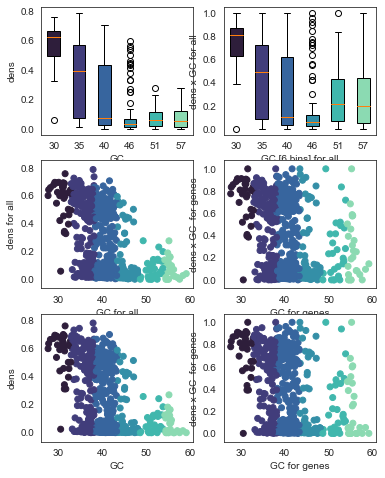

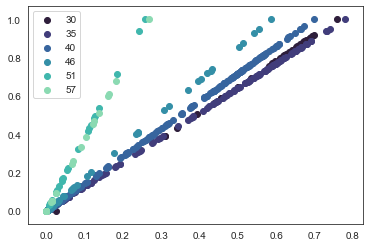

In [22]:
# It can be done for GC
corrected = d.cqn(condition='GC', bins=6, same_size=False, normalization='minmax', annotation='all')

In [23]:
corrected

,name,dens,dens_by_GC,gc,label
MPN001,MPN001,0.008746,0.011222,33.916084,1
MPN002,MPN002,0.317422,0.454972,42.534909,2
MPN003,MPN003,0.005117,0.008730,45.649949,3
MPN004,MPN004,0.005732,0.009780,45.537485,3
MPN005,MPN005,0.008795,0.015007,45.411392,3
...,...,...,...,...,...
MPNt33,MPNt33,0.000000,0.000000,59.210526,5
MPNt34,MPNt34,0.014286,0.053102,54.545455,5
MPNt35,MPNt35,0.000000,0.000000,56.321839,5
MPNt36,MPNt36,0.121622,0.452080,55.421687,5


### Correlate positions and TSD correction

Exploring read count correlation between insertions and contiguous positions can unveil artifacts such as Transposon Duplicated Sites, that can increase read count signal artifactually (for example +7 in our case):


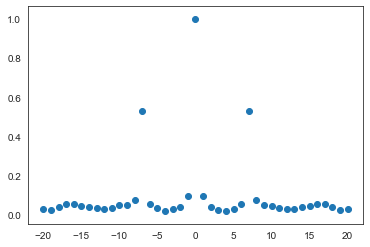

In [41]:
corr = d.correlation_by_distance(min_relative_distance=-20)

plt.scatter(list(corr.keys()), list(corr.values()))
plt.show()

For correction we require reads separated by forward- and reverse-oriented (generated by default by FASTQINS):

In [46]:
d1 = d.correct_TSD(fw='./test/P02_R1_U0_PE1_fw.qins', rv='./test/P02_R1_U0_PE1_rv.qins')
print(d.coverage, d1.coverage)

25.9449481500354 24.486338704106107


### Differential Essentiality regions

Most important factor are extended NE N' and C'-termini, repeated regions and protein domains.

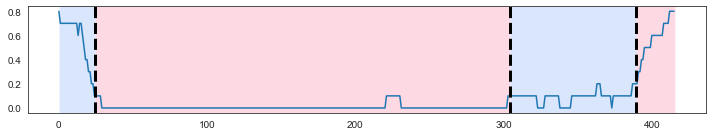

[265243 265523 265608 265634]


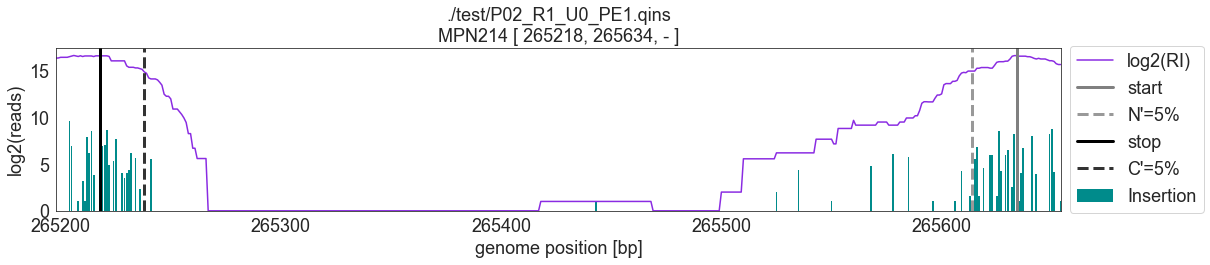

(5.995203836930456, 26.858513189448445)

In [72]:
# a metagene approach can be used to explore all genes together
metaprofile = anubis.metagene(d) # by default computed by 100 bins per bin and dens as metric

import ruptures as rpt


st, en, _ = d.annotation['MPN214']
d._update_roll_(10, metric='dens', overlapping=True)
signal = d._roll_[st:en]

# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=20)

# display
rpt.display(signal, result, result)
plt.show()
print(st+np.array(result))


d.plot_profile('MPN214')
anubis.index2perc(result[0], en-st+1), 100-anubis.index2perc(result[1], en-st+1)


We can also add domains from a HMMER prediction to plot below a profile:

[['PF09185.9|DUF1948', 34556, 34973, 2.9e-97]]


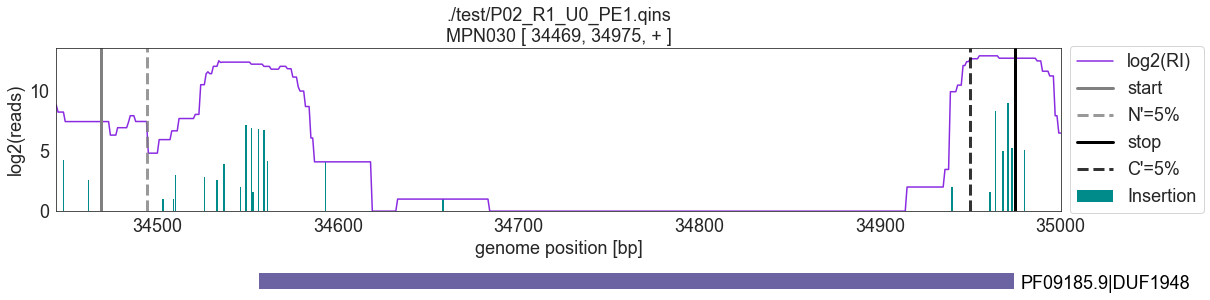

[<Figure size 1296x216 with 1 Axes>,

In [75]:
d.set_domains('./test/perdom.out')
print(d.domains['MPN030'])
d.plot_profile('MPN030', show_domains=True, domain_levels=1, domain_colors=1)

This can be done with a list of positions considered repeated in the genome.

### Reference essentiality estimates

/home/smiravet/crg/anubis/anubis/anubis/anubis_core.py:784: RuntimeWarning: invalid value encountered in true_divide
  return multiplying_factor*(np.array(value)-min(value))/(max(value)-min(value))


111
111


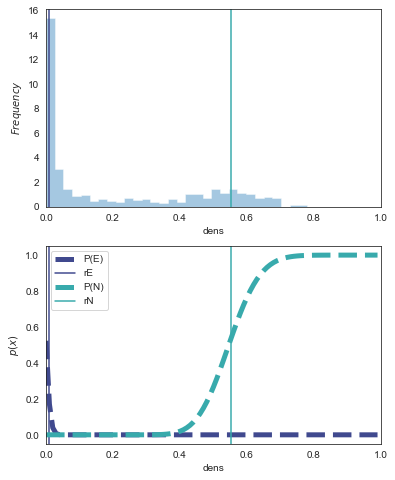

,identifier,left ann,right ann,strand,len,len_considered,goldset,dens,P(no insertions),P(saturation),P(E),P(N),LLR [log2(E/N)],class
0,MPN001,692,1834,+,1143,1029,E,0.008746,0.0,0.017,2.377916e-01,2.642257e-228,753.925604,F
1,MPN002,1838,2767,+,930,838,u,0.317422,0.0,0.019,0.000000e+00,1.814571e-23,-955.575508,N
2,MPN003,2869,4821,+,1953,1759,u,0.005117,0.0,0.013,8.361796e-01,0.000000e+00,inf,E
3,MPN004,4821,7340,+,2520,2268,u,0.005732,0.0,0.011,7.857050e-01,0.000000e+00,inf,E
4,MPN005,7312,8574,+,1263,1137,E,0.008795,0.0,0.016,2.281586e-01,5.071284e-252,832.651638,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,MPNt33,562556,562630,-,75,69,u,0.000000,0.0,0.065,4.001868e-01,2.815938e-17,53.657908,E
683,MPNt34,643913,643988,+,76,70,u,0.014286,0.0,0.064,9.587920e-02,6.428737e-16,47.083676,F
684,MPNt35,644970,645055,-,86,78,u,0.000000,0.0,0.061,4.388725e-01,1.953792e-19,60.962231,E
685,MPNt36,648912,648993,+,82,74,u,0.121622,0.0,0.062,4.106478e-10,1.984611e-09,-2.272883,F


In [80]:
# Poisson, absolute criteria

d.metric_by()
anubis.Poisson(d).predict(criteria='absolute')

111


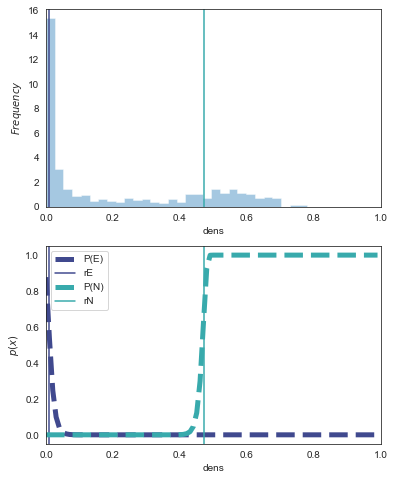

,identifier,left ann,right ann,strand,len,len_considered,goldset,dens,P(no insertions),P(saturation),P(E),P(N),LLR [log2(E/N)],class
0,MPN001,692,1834,+,1143,1029,E,0.008746,0.0,0.018,0.222938,5.216849e-207,683.090654,E
1,MPN002,1838,2767,+,930,838,u,0.317422,0.0,0.020,0.000000,2.219115e-56,-881.992728,F
2,MPN003,2869,4821,+,1953,1759,u,0.005117,0.0,0.014,1.000000,0.000000e+00,inf,E
3,MPN004,4821,7340,+,2520,2268,u,0.005732,0.0,0.012,1.000000,0.000000e+00,inf,E
4,MPN005,7312,8574,+,1263,1137,E,0.008795,0.0,0.017,0.186591,1.232578e-228,754.675880,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,MPNt33,562556,562630,-,75,69,u,0.000000,0.0,0.070,0.811222,8.045324e-15,46.518940,E
683,MPNt34,643913,643988,+,76,70,u,0.014286,0.0,0.069,0.460916,1.366377e-14,44.939213,E
684,MPNt35,644970,645055,-,86,78,u,0.000000,0.0,0.066,0.831720,1.167176e-16,52.661998,E
685,MPNt36,648912,648993,+,82,74,u,0.121622,0.0,0.068,0.000213,6.206638e-12,25.035766,F


In [82]:
# Gumbel, threshold criteria, NE gold set --> non-coding regions

d.metric_by()
anubis.Gumbel(d).predict(criteria='threshold', thr=0.01, prior={'E':'goldset', 'N':'intergenic'})

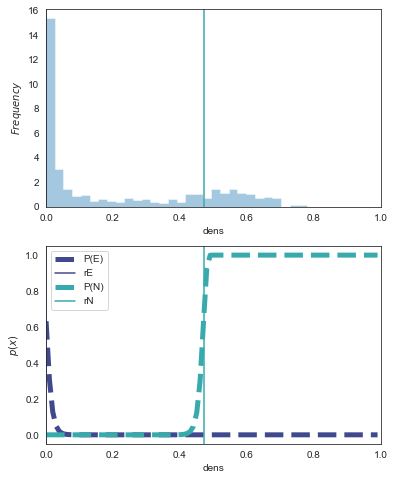

,identifier,left ann,right ann,strand,len,len_considered,goldset,dens,P(no insertions),P(saturation),P(E),P(N),LLR [log2(E/N)],class
0,MPN001,692,1834,+,1143,1029,u,0.008746,0.0,0.018,0.000123,5.216849e-207,672.271593,E
1,MPN002,1838,2767,+,930,838,u,0.317422,0.0,0.020,0.000000,2.219115e-56,-881.992728,N
2,MPN003,2869,4821,+,1953,1759,u,0.005117,0.0,0.014,0.000123,0.000000e+00,inf,E
3,MPN004,4821,7340,+,2520,2268,u,0.005732,0.0,0.012,0.000002,0.000000e+00,inf,E
4,MPN005,7312,8574,+,1263,1137,u,0.008795,0.0,0.017,0.000045,1.232578e-228,742.670944,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,MPNt33,562556,562630,-,75,69,u,0.000000,0.0,0.070,0.632121,8.045324e-15,46.159043,E
683,MPNt34,643913,643988,+,76,70,u,0.014286,0.0,0.069,0.307799,1.366377e-14,44.356700,E
684,MPNt35,644970,645055,-,86,78,u,0.000000,0.0,0.066,0.632121,1.167176e-16,52.266100,E
685,MPNt36,648912,648993,+,82,74,u,0.121622,0.0,0.068,0.000123,6.206638e-12,24.244981,E


In [83]:
# Gamma, foldchange criteria with threshold>3. NE gold set --> non-coding regions and assume E genes linear density=0

d.metric_by()
anubis.Gumbel(d).predict(criteria='foldchange', foldchange=3, prior={'E':'0', 'N':'intergenic'})

### Mixture models

These model have as an advantage the minimal parameterization required:

/home/smiravet/crg/anubis/anubis/anubis/anubis_core.py:784: RuntimeWarning: invalid value encountered in true_divide
  return multiplying_factor*(np.array(value)-min(value))/(max(value)-min(value))


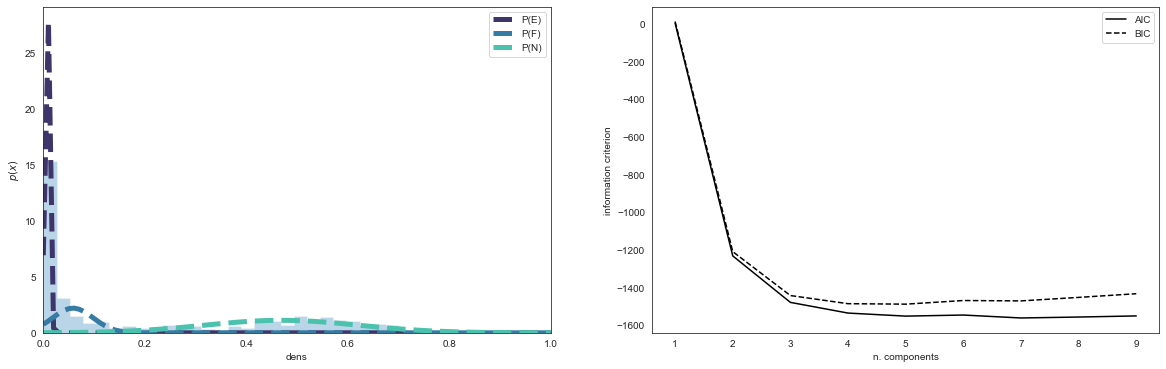

,identifier,left ann,right ann,strand,len,len_considered,dens,P(no insertions),P(saturation),P(E),P(F),P(N),class
0,MPN001,692,1834,+,1143,1029,0.008746,0.0,0.018,31.837,1.016,0.012,E
1,MPN002,1838,2767,+,930,838,0.317422,0.0,0.020,0.000,0.000,0.677,N
2,MPN003,2869,4821,+,1953,1759,0.005117,0.0,0.014,28.118,0.903,0.011,E
3,MPN004,4821,7340,+,2520,2268,0.005732,0.0,0.012,30.215,0.922,0.011,E
4,MPN005,7312,8574,+,1263,1137,0.008795,0.0,0.017,31.734,1.018,0.012,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,MPNt33,562556,562630,-,75,69,0.000000,0.0,0.070,6.920,0.755,0.010,E
683,MPNt34,643913,643988,+,76,70,0.014286,0.0,0.070,9.560,1.196,0.013,E
684,MPNt35,644970,645055,-,86,78,0.000000,0.0,0.066,6.920,0.755,0.010,E
685,MPNt36,648912,648993,+,82,74,0.121622,0.0,0.068,0.000,0.625,0.083,F


In [85]:
d.metric_by()
anubis.GaussianMixture(d).predict()



## Contact

This project has been fully developed at [Centre for Genomic Regulation](http://www.crg.eu/) at the group of [Design of Biological Systems](http://www.crg.eu/en/luis_serrano).

If you experience any problem at any step involving the program, you can use the 'Issues' page of this repository or contact:

[Miravet-Verde, Samuel](mailto:samuel.miravet@crg.eu)       
[Lluch-Senar, Maria](mailto:maria.lluch@crg.eu)       
[Serrano, Luis](mailto:luis.serrano@crg.eu)